In [6]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import cPickle as pickle
import io
from sklearn.linear_model import LinearRegression


In [9]:
MovieTable = pd.read_pickle('MovieDataClean_10_15.pkl')
# MovieTable = pd.DataFrame(MovieTable).transpose()
MovieTable.head()

,budget,cast,director,genres,gross,id,imdb_id,imdb_rating,mpaa,name,opening_gross,opening_theathers,runtime,year,director_boxoffice,cast_boxoffice,genres_boxoffice
189,65000000,"[0000620, 0004695, 0000982, 0330687, 0206257, ...","[0588340, 0001675]","[Action, Crime, Thriller]",13757804,189,tt0458481,6.5,R,Sin City: A Dame to Kill For,6317683,2894,102,2014,16929594,30220545,36087236
1865,380000000,"[0000136, 0004851, 0001691, 0574534, 0573618, ...",[0551128],"[Action, Adventure, Fantasy]",241071802,1865,tt1298650,6.7,PG-13,Pirates of the Caribbean: On Stranger Tides,90151958,4155,136,2011,184537087,174422411,70050167
1930,215000000,"[1940449, 1297015, 0406975, 0001459, 0000640, ...",[1989536],"[Action, Adventure]",262030663,1930,tt0948470,7,PG-13,The Amazing Spider-Man,62004688,4318,136,2012,232442298,193142424,66021895
4258,20000000,"[0864308, 0005350, 3856188, 4795991, 5777210, ...","[0002700, 0001878]",[Comedy],32015787,4258,tt0795461,3.5,PG-13,Scary Movie 5,14157367,3402,86,2013,41643139,50143497,28086601
7978,150000000,"[0581163, 2247629, 1289434, 0001125, 3785649, ...",[0002653],"[Drama, Fantasy, Horror, Thriller]",61979680,7978,tt0780653,5.8,R,The Wolfman,31479235,3222,102,2010,61979680,70730664,36944285


In [10]:
# remove NaN value
MovieTable = MovieTable[pd.notnull(MovieTable['imdb_rating'])]
MovieTable = MovieTable[pd.notnull(MovieTable['cast'])]
MovieTable = MovieTable[pd.notnull(MovieTable['director'])]

In [62]:
X = MovieTable[['budget','cast_boxoffice', 'director_boxoffice', 'genres_boxoffice', 'opening_gross']]
lm = LinearRegression()
lm.fit(X, MovieTable.gross)
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,budget,-0.018642
1,cast_boxoffice,0.637188
2,director_boxoffice,0.225203
3,genres_boxoffice,-0.084126
4,opening_gross,1.100401


In [64]:
MovieTableP = pd.read_pickle('MovieDataClean_16.pkl')
X = MovieTableP[['budget','cast_boxoffice', 'director_boxoffice', 'genres_boxoffice','opening_gross']]
prediction = lm.predict(X)

In [66]:
MovieTableP['predict_gross'] = prediction.astype(int)

In [ ]:
MovieTableP[['predict_gross', 'gross','name']].sort(columns=['gross'], ascending=[0])

In [ ]:
MovieTableP[['predict_gross', 'gross','name']].sort(columns=['predict_gross'], ascending=[0])

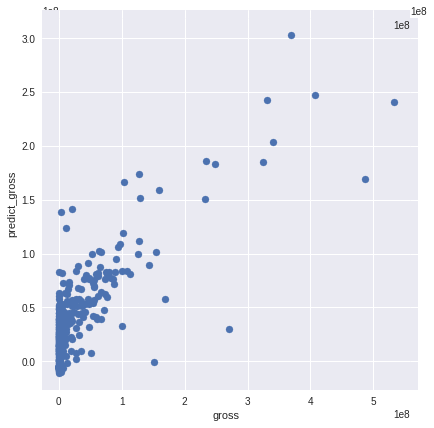

In [67]:
grid = sns.JointGrid(MovieTableP.gross, MovieTableP.predict_gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

In [68]:
np.sum(np.abs(MovieTableP.gross - MovieTableP.predict_gross))/float(len(MovieTableP))

23796571.035714287